# Problem 1A:

***

## Importing the Libraries

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols     
from statsmodels.stats.anova import _get_covariance,anova_lm 
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the dataset CSV file

In [2]:
df = pd.read_csv('SalaryData.csv')

## Checking the top 5 records

In [3]:
df.sample(5)

,Education,Occupation,Salary
16,Bachelors,Adm-clerical,162494
10,Doctorate,Prof-specialty,247724
22,Bachelors,Sales,149909
37,Bachelors,Exec-managerial,173664
4,Doctorate,Sales,170769


## Checking the shape and information of the dataframe

In [4]:
df.shape

(40, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## Checking the summary of the dataframe

In [6]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


As we can observe from above summary, Salary variable ranges from 50103.00 to 260151.00 with mean 162186.875 and median 169100.00

# One Way ANOVA :

## 1. On Salary with respect to Education

1.1-
<br>
$H_0$ = For all the education levels mean salary is equal
<br>
$H_1$ = For at least one education level mean salary is not equal

In [7]:
# Checking distinct values of Education
df['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [8]:
formula = 'Salary~ Education' #1.2
model = ols(formula,df[['Education','Salary']]).fit()
ano_tbl = anova_lm(model)
print(ano_tbl)

             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN


#1.4 Since the p value is less than the significance level, we can reject the null hypothesis and states that there is a difference in the mean salaries of employees with different education levels

<AxesSubplot:xlabel='Education', ylabel='Salary'>

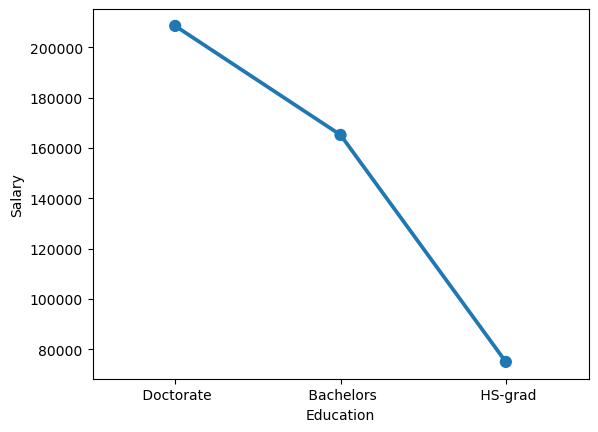

In [9]:
sns.pointplot(x='Education', y='Salary', data=df, ci=None)

In [10]:
# 1.4: Tukey test for comparing the combinations of these Education levels for checking which ones (means) are not equal.  
mc = MultiComparison(df['Salary'], df['Education'])
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7537.2745  79010.8589   True
 Bachelors    HS-grad  -90114.1556    0.0 -132039.7353 -48188.5758   True
 Doctorate    HS-grad -133388.2222    0.0 -174819.5736 -91956.8709   True
-------------------------------------------------------------------------


## 2. On Salary with respect to Occupation

$H_0$= For all the occupation among employees the mean salary is equal 
<br>
$H_1$  = For at least one occupation among employees the mean salary is not equal

In [11]:
#Checking distinct values of Occupation
df['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [12]:
formula = 'Salary~ Occupation' #1.2
model = ols(formula,df[['Occupation','Salary']]).fit()
ano_tbl = anova_lm(model)
print(ano_tbl)

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


Since the p value is greater than the significance level, we can not reject the null hypothesis and states that there is no difference in the mean salaries of employees with different occupations 

In [13]:
# tukey test
mc = MultiComparison(df['Salary'], df['Occupation'])
print(mc.tukeyhsd())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4133  -40414.1768 151800.7768  False
    Adm-clerical   Prof-specialty  27528.8538 0.7478  -46276.6569 101334.3646  False
    Adm-clerical            Sales  16180.1167 0.9374  -58950.5539  91310.7873  False
 Exec-managerial   Prof-specialty -28164.4462 0.8439 -120501.5231  64172.6308  False
 Exec-managerial            Sales -39513.1833  0.668 -132912.8623  53886.4956  False
  Prof-specialty            Sales -11348.7372  0.972  -81591.9315  58894.4572  False
------------------------------------------------------------------------------------


<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

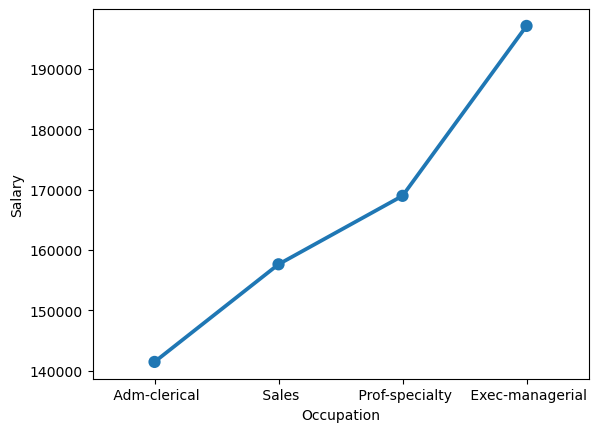

In [14]:
sns.pointplot(x='Occupation', y='Salary', data=df, ci=None)

#### Let us check whether there is any interaction effect between the treatments.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

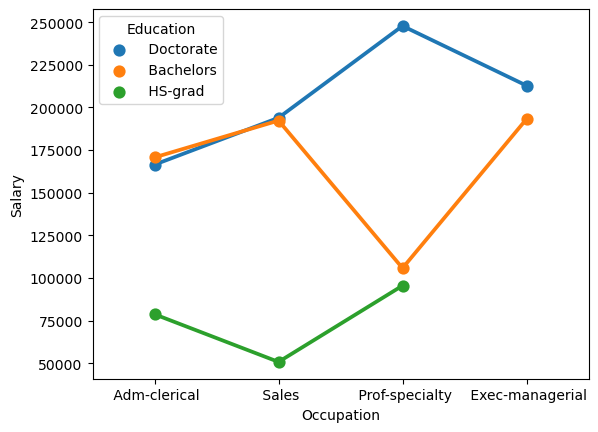

In [15]:
sns.pointplot(x='Occupation',y='Salary',data=df,ci=None,hue='Education' ) #1.5

As we can clearly observe that the 'Occupation' and 'Education' has got some interaction between them. Hence, we should take this interaction effect into consideration while performing ANOVA. 

***

# Problem 1B:

# Two Way ANOVA

In [16]:
pd.crosstab(index=df['Education'],columns=df['Occupation'],margins=True,values= df['Salary'],aggfunc=np.mean)

Occupation,Adm-clerical,Exec-managerial,Prof-specialty,Sales,All
Education,,,,,
Bachelors,170711.000000,193201.75,105787.750000,192300.750000,165152.933333
Doctorate,166457.750000,212781.00,247772.833333,193916.600000,208427.000000
HS-grad,78759.666667,NaN,95534.333333,50822.333333,75038.777778
All,141424.300000,197117.60,168953.153846,157604.416667,162186.875000


In [17]:
pd.crosstab(index=df['Education'],columns=df['Occupation'],margins=True)

Occupation,Adm-clerical,Exec-managerial,Prof-specialty,Sales,All
Education,,,,,
Bachelors,3,4,4,4,15
Doctorate,4,1,6,5,16
HS-grad,3,0,3,3,9
All,10,5,13,12,40


In [18]:
pd.crosstab(df['Education'],df['Occupation'],df['Salary'],margins=True,aggfunc=np.mean)

Occupation,Adm-clerical,Exec-managerial,Prof-specialty,Sales,All
Education,,,,,
Bachelors,170711.000000,193201.75,105787.750000,192300.750000,165152.933333
Doctorate,166457.750000,212781.00,247772.833333,193916.600000,208427.000000
HS-grad,78759.666667,NaN,95534.333333,50822.333333,75038.777778
All,141424.300000,197117.60,168953.153846,157604.416667,162186.875000


## Null and alternate hypothesis
### Education effects:
$H_0$: $\mu_{1..} = \mu_{2..}= \mu_{3..}$
<br>
$H_1$: not all $\mu_i$ are equal
<br>
where 1,2,3 refers to Doctorate, Bachelors and HS-grad education level respectively

### Occupation effects:
$H_0$: $\mu_{..1} = \mu_{..2}= \mu_{..3} = \mu_{..4}$
<br>
$H_1$ : not all $\mu_j$ are equal 
<br>
where 1,2,3,4 refers to Prof-specialty,Sales,Adm-clerical and Exec-managerial respectively

### Interaction effects:

$H_0$: The interaction effect does not exist 
<br>
$H_1$: An interaction effect exists

In [19]:
formula = 'Salary ~  C(Education)+ C(Occupation) + C(Education):C(Occupation)' #1.6
model = ols(formula,df).fit()
anov_tabl = anova_lm(model)
print(anov_tabl)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


In [44]:
pd.DataFrame(anov_tabl)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


Since the p-value is less than the significance level in all three cases considered including the interaction effect of the Education and Occupation, we can reject the null hypotheses

***

# Problem 2

# Education-Post 12th Standard

## Loading the dataset CSV file

In [20]:
df2 = pd.read_csv('Education+-+Post+12th+Standard.csv')

## Checking the top 5 records

In [21]:
df2.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Checking the shape and information of the dataframe

In [22]:
df2.shape

(777, 18)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

## Check for Duplicate records

In [24]:
df2.duplicated().sum()

0

No duplicates are present in the dataset

## Data Visualization

### Univariate Analysis

In [25]:
df2.describe().T #2.1

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Insights:**

1. Most of the features are having their means greater than median values, indicating that the distributions are right skewed except 'PhD', 'Terminal'.
2. Using the median values,we can say that acceptance rate in the universities is around 70%
3. Among these universities, 54% or more new students are within the top 25 and 23% or more new students are within the top 10 in Higher Secondary Class.  
4. Student vs Faculty ratio ranges from as low as 2.5 to 39.8, which is quite high. 
5. Graduation rates for 75% of the universities is upto 78.0 which is a good sign for the education level for these institutions. 

In [26]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df2[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    print("****************************************************************************\n")

In [27]:
df2_num = df2.select_dtypes(include = ['float64', 'int64'])
lstnumcols = list(df2_num.columns.values)
len(lstnumcols)

17

Distribution of Apps
----------------------------------------------------------------------------


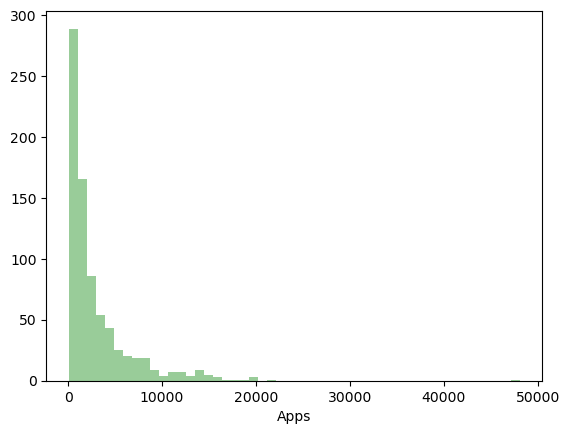

BoxPlot of Apps
----------------------------------------------------------------------------


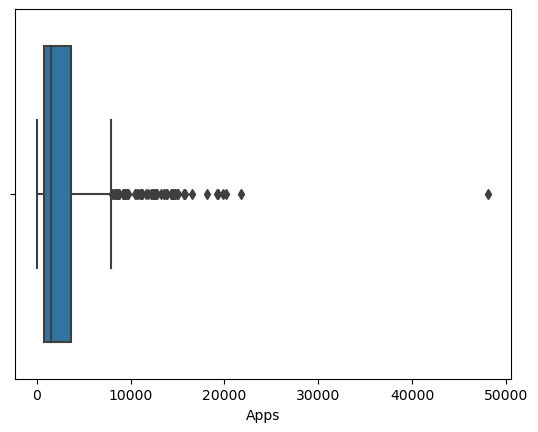

----------------------------------------------------------------------------
****************************************************************************

Distribution of Accept
----------------------------------------------------------------------------


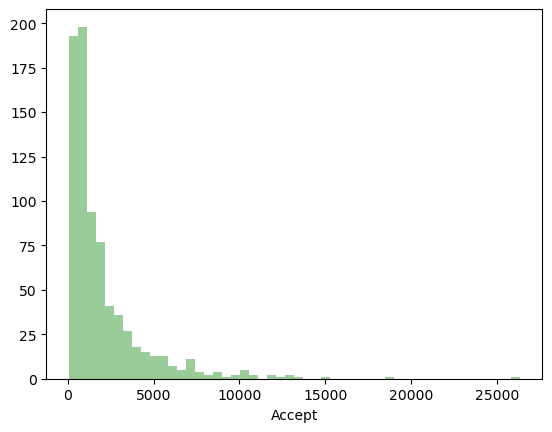

BoxPlot of Accept
----------------------------------------------------------------------------


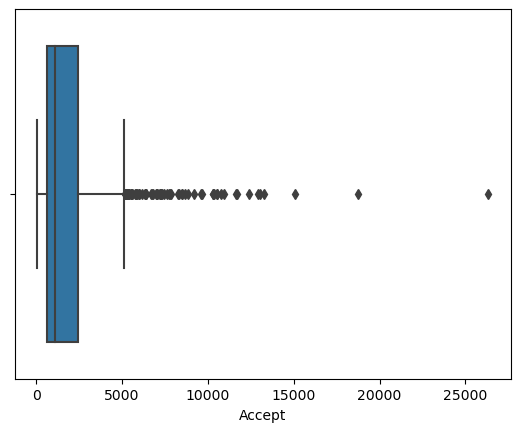

----------------------------------------------------------------------------
****************************************************************************

Distribution of Enroll
----------------------------------------------------------------------------


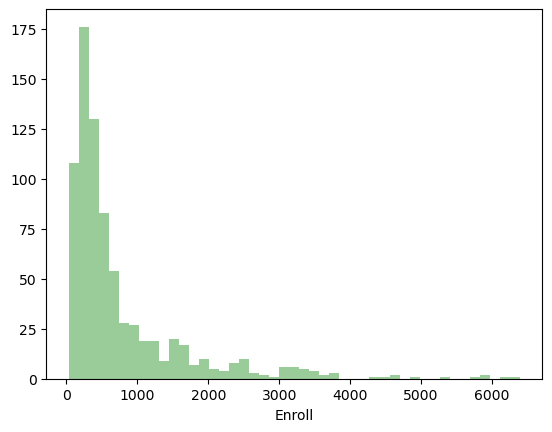

BoxPlot of Enroll
----------------------------------------------------------------------------


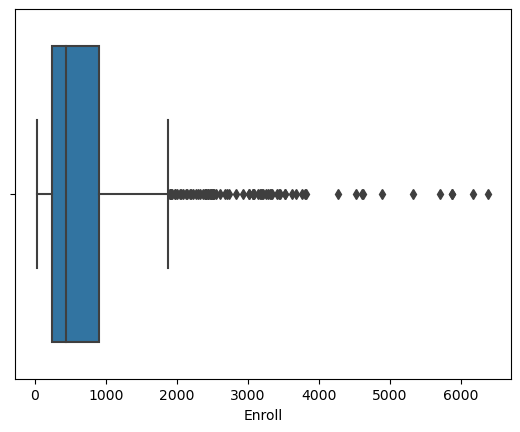

----------------------------------------------------------------------------
****************************************************************************

Distribution of Top10perc
----------------------------------------------------------------------------


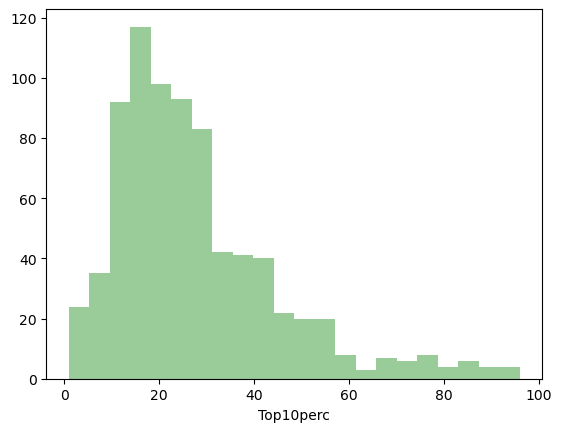

BoxPlot of Top10perc
----------------------------------------------------------------------------


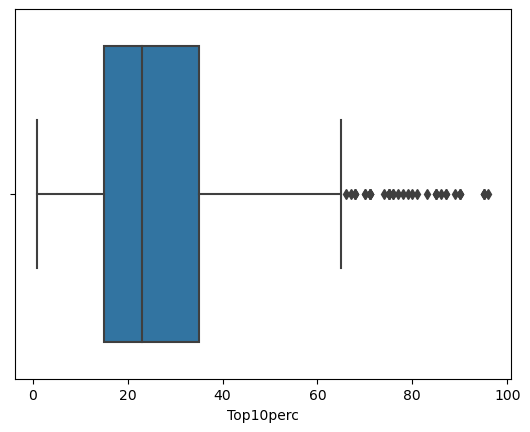

----------------------------------------------------------------------------
****************************************************************************

Distribution of Top25perc
----------------------------------------------------------------------------


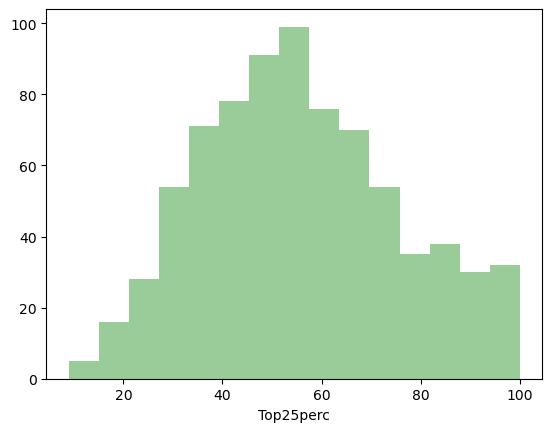

BoxPlot of Top25perc
----------------------------------------------------------------------------


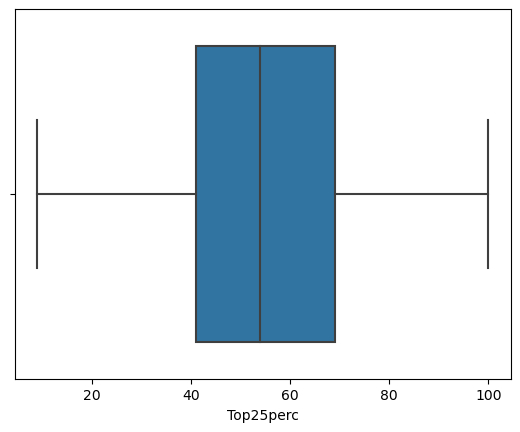

----------------------------------------------------------------------------
****************************************************************************

Distribution of F.Undergrad
----------------------------------------------------------------------------


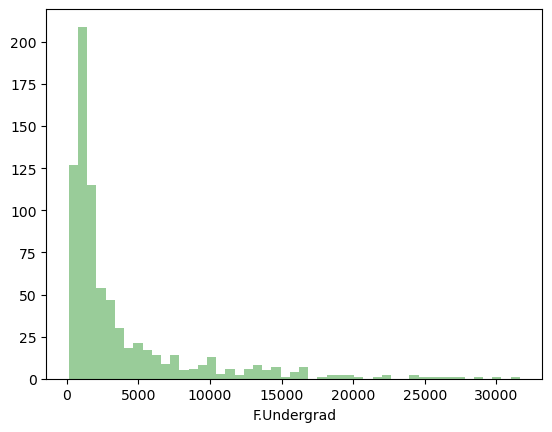

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


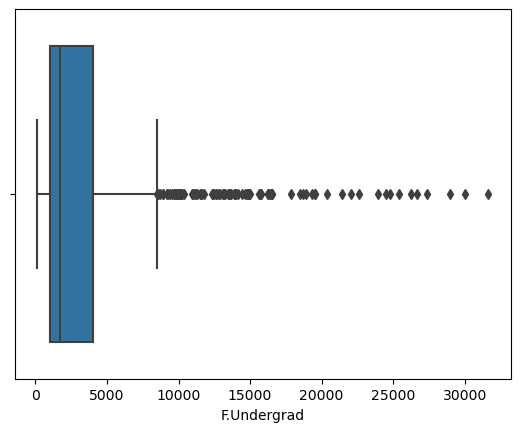

----------------------------------------------------------------------------
****************************************************************************

Distribution of P.Undergrad
----------------------------------------------------------------------------


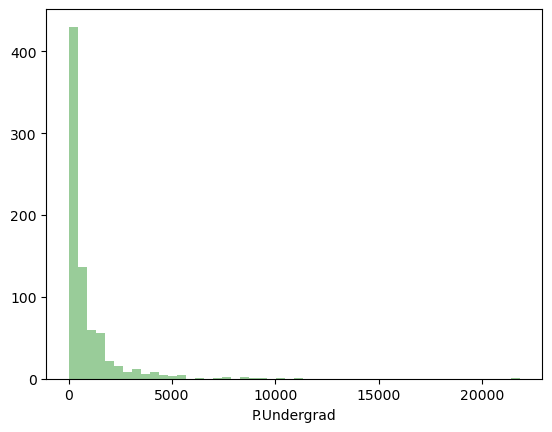

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


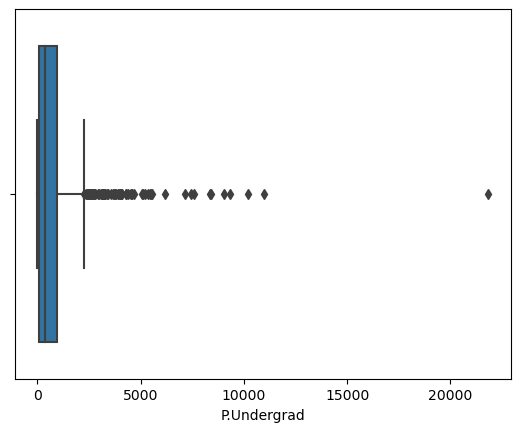

----------------------------------------------------------------------------
****************************************************************************

Distribution of Outstate
----------------------------------------------------------------------------


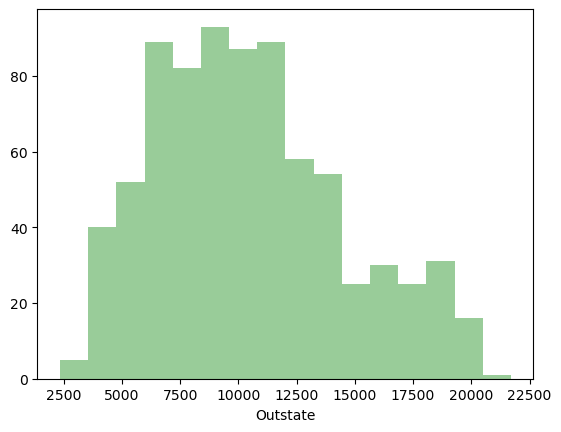

BoxPlot of Outstate
----------------------------------------------------------------------------


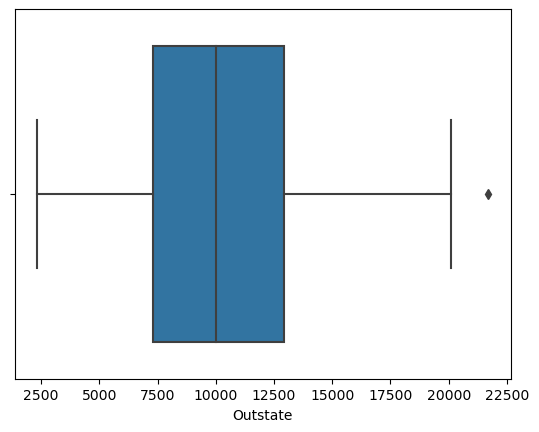

----------------------------------------------------------------------------
****************************************************************************

Distribution of Room.Board
----------------------------------------------------------------------------


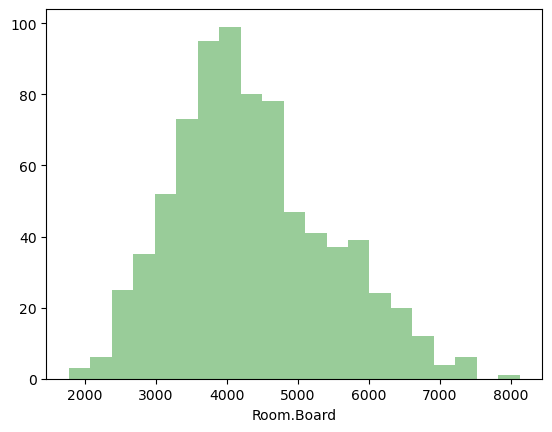

BoxPlot of Room.Board
----------------------------------------------------------------------------


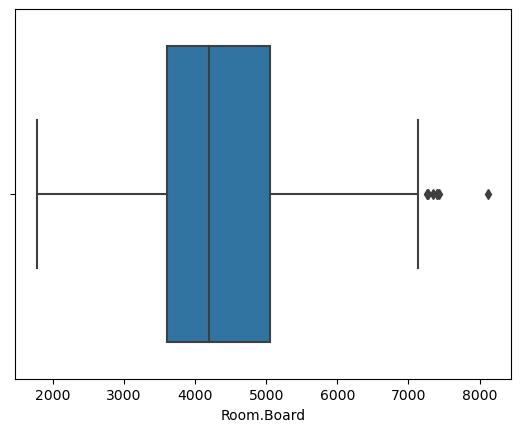

----------------------------------------------------------------------------
****************************************************************************

Distribution of Books
----------------------------------------------------------------------------


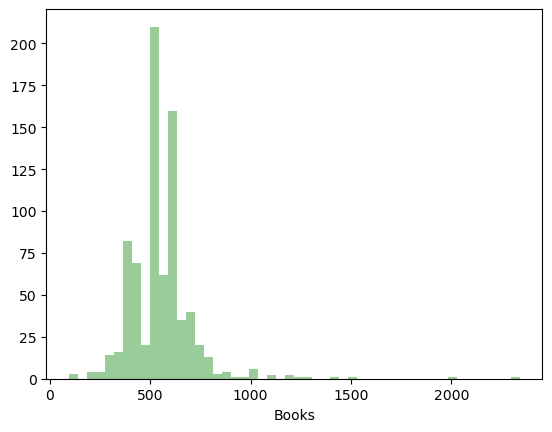

BoxPlot of Books
----------------------------------------------------------------------------


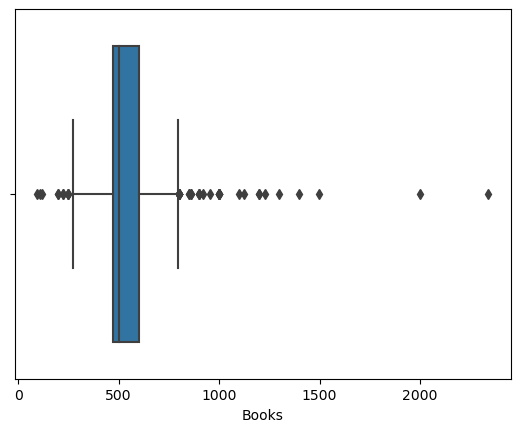

----------------------------------------------------------------------------
****************************************************************************

Distribution of Personal
----------------------------------------------------------------------------


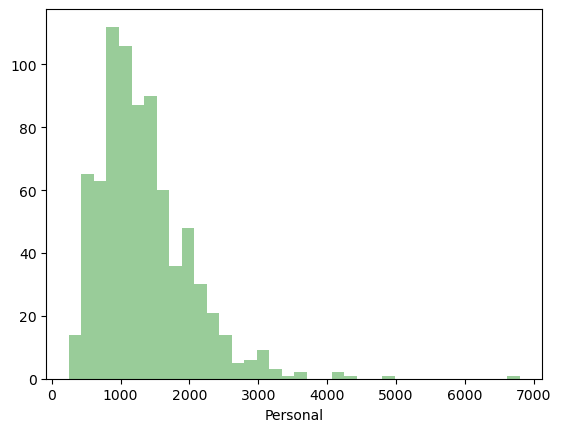

BoxPlot of Personal
----------------------------------------------------------------------------


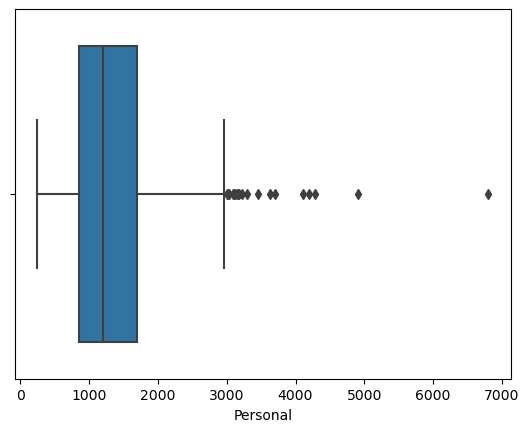

----------------------------------------------------------------------------
****************************************************************************

Distribution of PhD
----------------------------------------------------------------------------


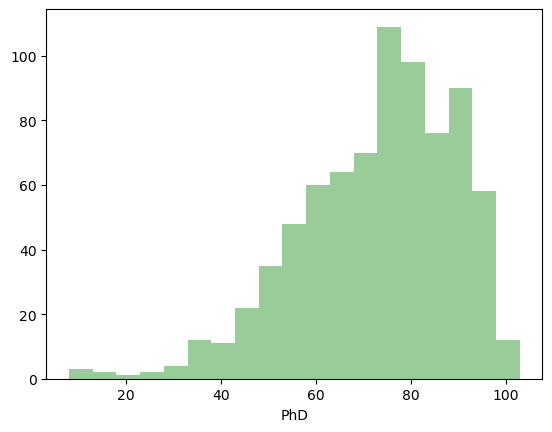

BoxPlot of PhD
----------------------------------------------------------------------------


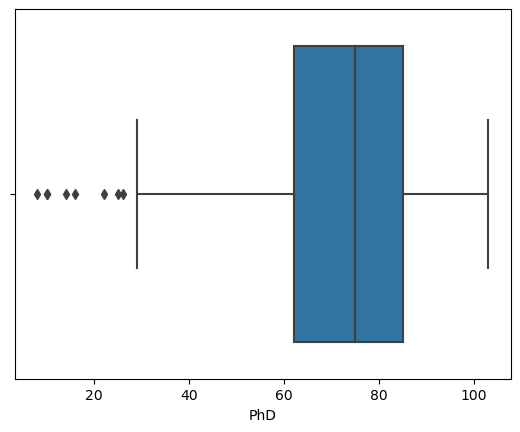

----------------------------------------------------------------------------
****************************************************************************

Distribution of Terminal
----------------------------------------------------------------------------


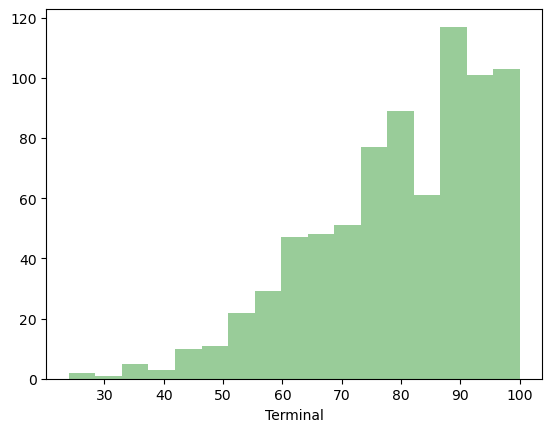

BoxPlot of Terminal
----------------------------------------------------------------------------


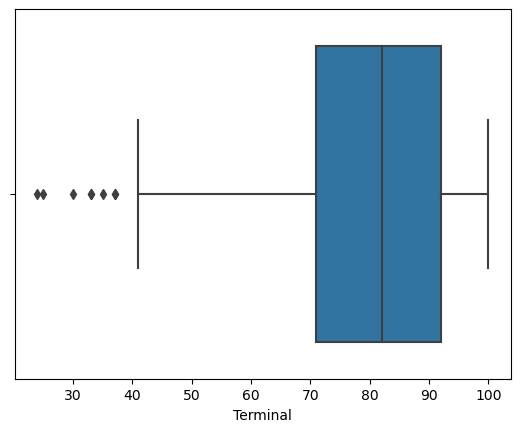

----------------------------------------------------------------------------
****************************************************************************

Distribution of S.F.Ratio
----------------------------------------------------------------------------


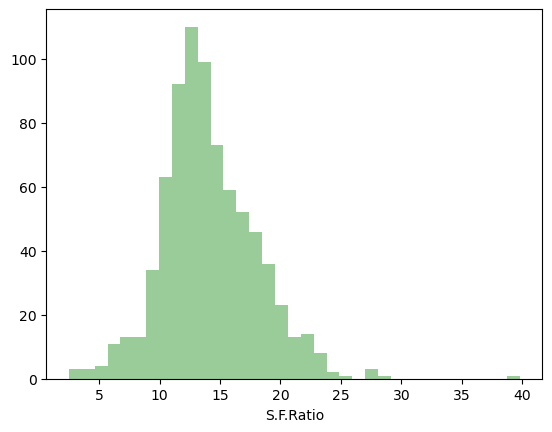

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


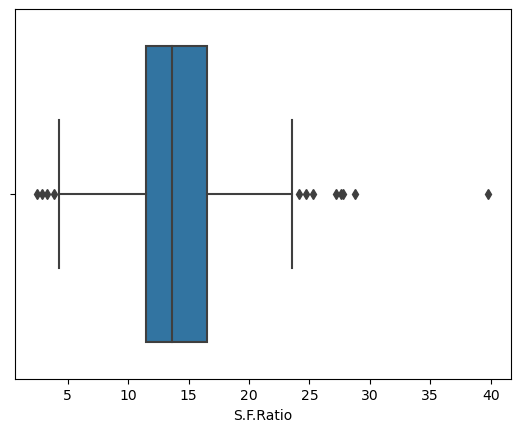

----------------------------------------------------------------------------
****************************************************************************

Distribution of perc.alumni
----------------------------------------------------------------------------


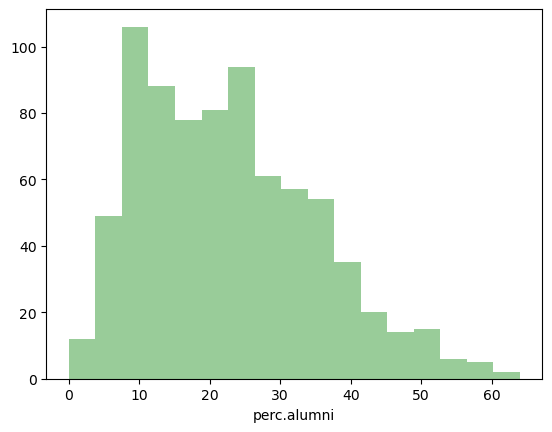

BoxPlot of perc.alumni
----------------------------------------------------------------------------


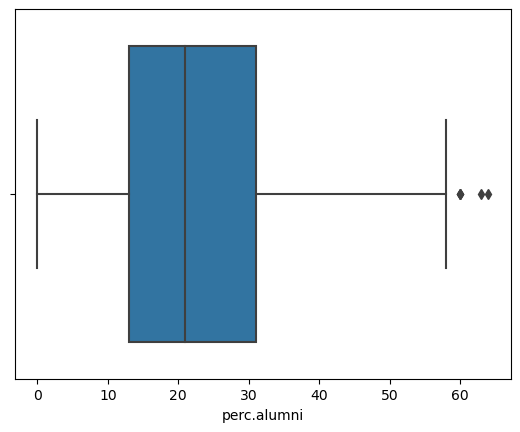

----------------------------------------------------------------------------
****************************************************************************

Distribution of Expend
----------------------------------------------------------------------------


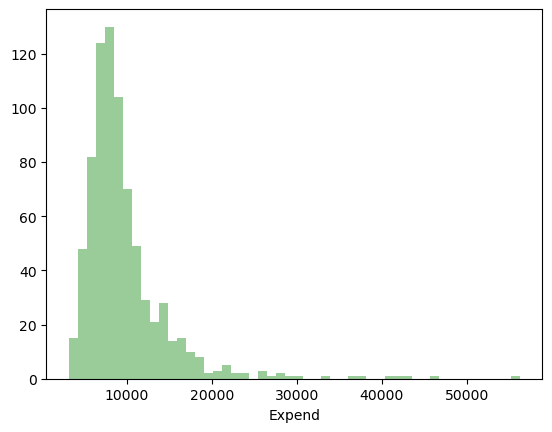

BoxPlot of Expend
----------------------------------------------------------------------------


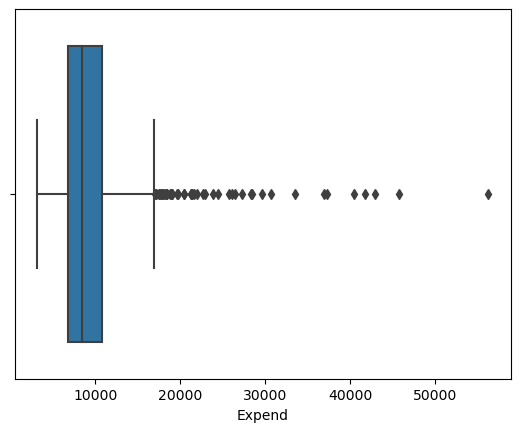

----------------------------------------------------------------------------
****************************************************************************

Distribution of Grad.Rate
----------------------------------------------------------------------------


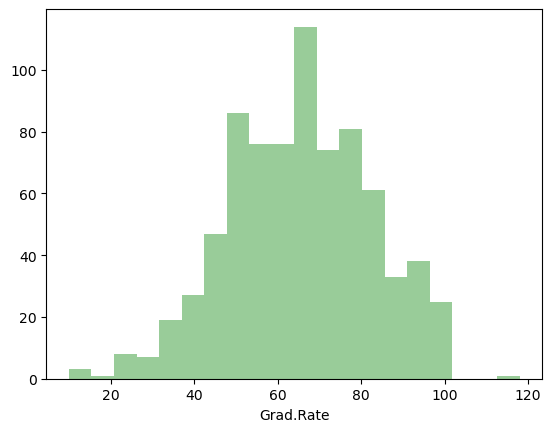

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


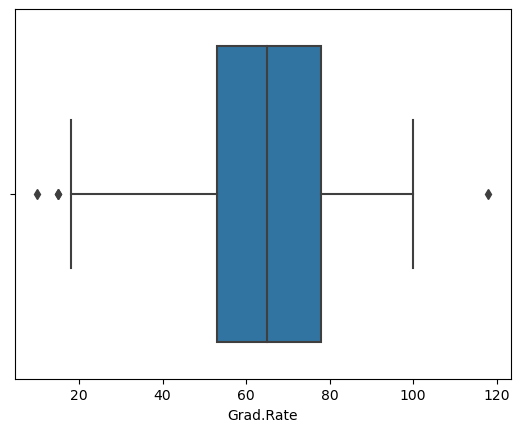

----------------------------------------------------------------------------
****************************************************************************



In [28]:
for x in lstnumcols:
    univariateAnalysis_numeric(x,20)

### Bivariate Analysis

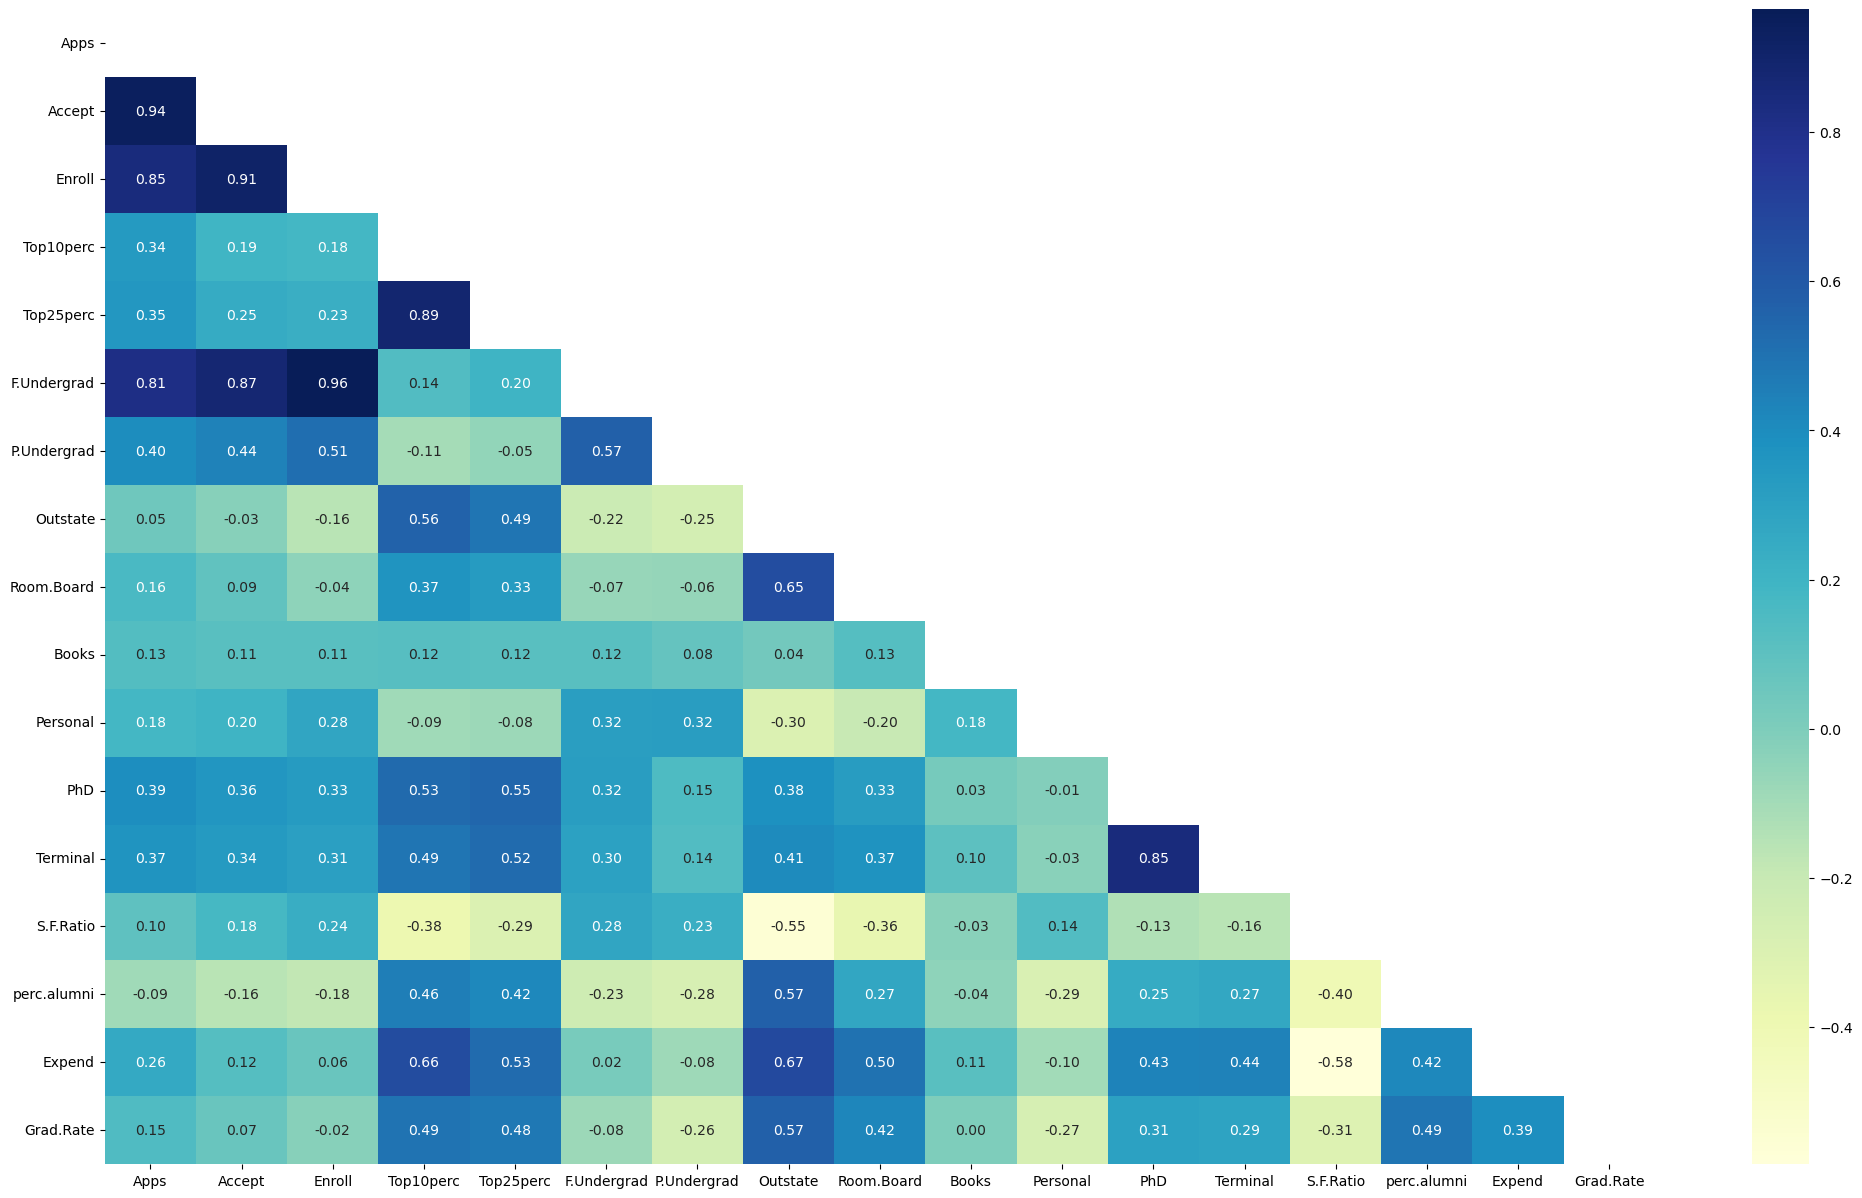

In [29]:
corr = df2_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool)) 
plt.figure(figsize=(25, 15))
sns.heatmap(df2_num.corr(), annot=True,fmt='.2f',mask=mask,cmap="YlGnBu")
plt.show()

**Insights:**

1. 'F.Undergrad' feature shows high positive correlation with the 'Apps', 'Accept' and 'Enroll' features which means that most of the students are applying for Undergrad programs. 
2. Intrestingly, 'Outstate' feature shows moderately high positive correlation with 'Top10perc' and 'Top25perc' feature which could be interpreted as the students from "Out-states" are performing well in their universities.
3. Also, 'Outstate' feature depicts negative correlation with the 'S.F. Ratio' feature which shows that as higher as the number of students from "Out-states" lower is the student faculty ratio.
4. 'Expend' feature has also shown negative correlation with 'S.F. ratio' which could mean that the students in the universities with low Student vs Facult ratio are spending more than the rest.

# PCA

In [30]:
# Step-1: Scaling
from scipy.stats import zscore

In [31]:
df2_num_s = pd.DataFrame(zscore(df2_num),columns=df2_num.columns)

## Checking for outliers before Scaling

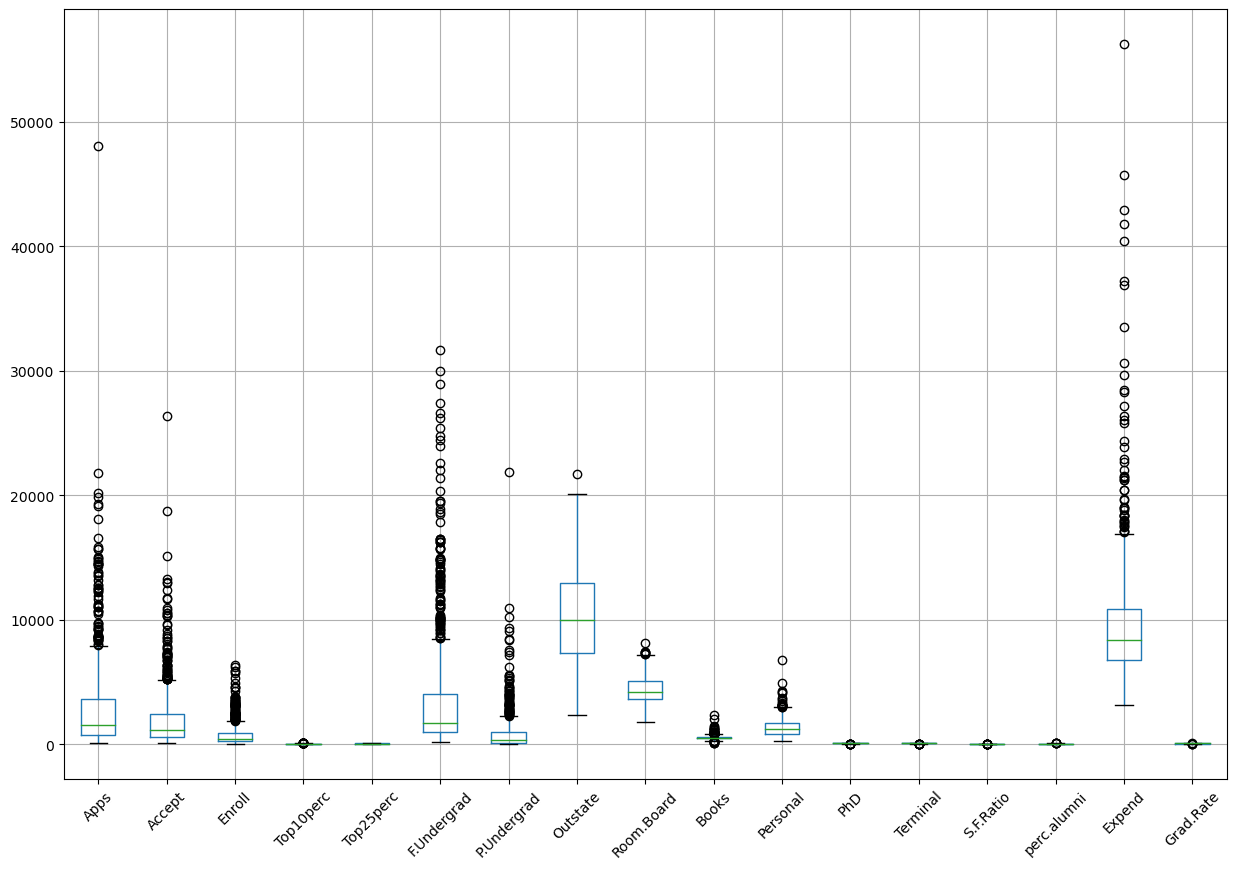

In [32]:
plt.figure(figsize=(15,10)) #2.4
df2_num.boxplot();
plt.xticks(rotation='45');

As it is clearly visible from the above box plot almost each one the variables has got outliers. (Except 'Top25perc' variable)
<br>
But due to different scales, some features can not be clearly visualised.

## Checking for outliers after scaling

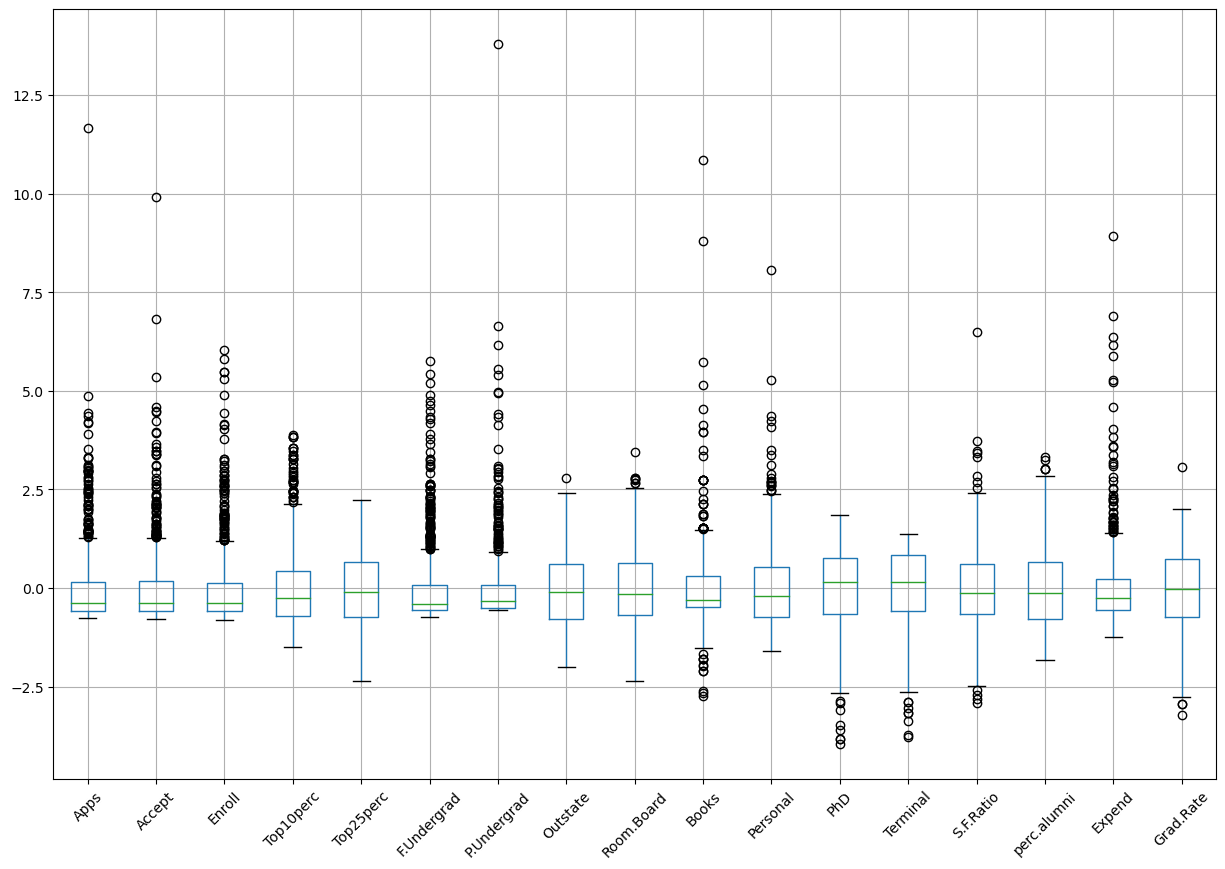

In [33]:
plt.figure(figsize=(15,10))
df2_num_s.boxplot();
plt.xticks(rotation='45');

Compared to ealier boxplot in this one the plots are much more clear due to scaling. Now we can also compare the number of outliers present such as:
1. The number of outliers are very high in Apps, Accept, Enroll, Top10perc, F.Undergrad, P.Undergrad, Books, Personal and Expend variables.
2. Apps has got one extremely high outlier which was also visible in earlier boxplot
3. The Oustate, Room.Board, S.F. Ratio, Perc.Almuni and Grad.Rate has got relatively less outliers compared to the ones mentioned in earlier point.
4. Only Top25perc variable has got no outlier.

## Checking the summary of the dataframe

In [34]:
df2_num_s.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,6.355797e-17,1.000644,-0.755134,-0.575441,-0.373254,0.160912,11.658671
Accept,777.0,6.774575e-17,1.000644,-0.794764,-0.577581,-0.371011,0.165417,9.924816
Enroll,777.0,-5.249269e-17,1.000644,-0.802273,-0.579351,-0.372584,0.131413,6.043678
Top10perc,777.0,-2.753232e-17,1.000644,-1.506526,-0.712380,-0.258583,0.422113,3.882319
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,-1.661405e-16,1.000644,-0.734617,-0.558643,-0.411138,0.062941,5.764674
P.Undergrad,777.0,-3.029180e-17,1.000644,-0.561502,-0.499719,-0.330144,0.073418,13.789921
Outstate,777.0,6.515595e-17,1.000644,-2.014878,-0.776203,-0.112095,0.617927,2.800531
Room.Board,777.0,3.570717e-16,1.000644,-2.351778,-0.693917,-0.143730,0.631824,3.436593
Books,777.0,-2.192583e-16,1.000644,-2.747779,-0.481099,-0.299280,0.306784,10.852297


As we can obseve the mean for all the features is tending to zero and std is tending to 1.

In [35]:
#Checking covariance matrix for non-standardised data
cov = np.cov(df2_num.T)
cov = pd.DataFrame(cov,columns=df2_num_s.columns,index=df2_num_s.columns)
cov

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Accept,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
Enroll,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Top10perc,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Top25perc,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
F.Undergrad,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
P.Undergrad,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
Outstate,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Room.Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Books,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


In [36]:
#Step 2: formation of covariance and correlation matrix for the standardised data

#Covariance Matrix
cov = np.cov(df2_num_s.T)
cov = pd.DataFrame(cov,columns=df2_num_s.columns,index=df2_num_s.columns)
cov

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896
F.Undergrad,0.815540,0.875350,0.965883,0.141471,0.199702,1.001289,0.571247,-0.216020,-0.068979,0.115699,0.317608,0.318747,0.300406,0.280064,-0.229758,0.018676,-0.078875
P.Undergrad,0.398777,0.441839,0.513730,-0.105492,-0.053646,0.571247,1.001289,-0.253839,-0.061405,0.081304,0.320294,0.149306,0.142086,0.232830,-0.281154,-0.083676,-0.257332
Outstate,0.050224,-0.025788,-0.155678,0.563055,0.490024,-0.216020,-0.253839,1.001289,0.655100,0.038905,-0.299472,0.383476,0.408509,-0.555536,0.566992,0.673646,0.572026
Room.Board,0.165152,0.091016,-0.040284,0.371959,0.331917,-0.068979,-0.061405,0.655100,1.001289,0.128128,-0.199685,0.329627,0.375022,-0.363095,0.272714,0.502386,0.425489
Books,0.132729,0.113672,0.112856,0.119012,0.115676,0.115699,0.081304,0.038905,0.128128,1.001289,0.179526,0.026940,0.100084,-0.031970,-0.040260,0.112554,0.001062


In [37]:
# Correlation matrix
corr = df2_num_s.corr()
corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


As we can observe that the values in covariance matrix and correlation matrix are exactly equal upto two decimal places. **#2.3**

In [38]:
# Step 3: calculation of eigen vectors and eigen values 
# 2.5
eig_vals,eig_vecs = np.linalg.eig(cov)
eig = pd.DataFrame(eig_vecs.T,columns=df2_num.columns)

# making a new column for displaying corresponding eigen values 
eig['eig_values']=eig_vals
eig.sort_values(by='eig_values',ascending=False)
eig['Eigen vec num']= [i for i in range(1,18)]
eig.reset_index(drop=True)
eig.set_index('Eigen vec num')

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,eig_values
Eigen vec num,,,,,,,,,,,,,,,,,,
1,-0.248766,-0.207602,-0.176304,-0.354274,-0.344001,-0.154641,-0.026443,-0.294736,-0.249030,-0.064758,0.042529,-0.318313,-0.317056,0.176958,-0.205082,-0.318909,-0.252316,5.450522
2,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241,4.483607
3,0.063092,0.101249,0.082986,-0.035056,0.024148,0.061393,-0.139682,-0.046599,-0.148967,-0.677412,-0.499721,0.127028,0.066038,0.289848,0.146989,-0.226744,0.208065,1.174668
4,-0.281311,-0.267817,-0.161827,0.051547,0.109767,-0.100412,0.158558,-0.131291,-0.184996,-0.087089,0.230711,0.534725,0.519443,0.161189,-0.017314,-0.079273,-0.269129,1.008206
5,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268,0.934231
6,0.016237,-0.007535,0.042558,0.052693,-0.033092,0.043454,0.191199,0.030000,-0.162755,-0.641055,0.331398,-0.091256,-0.154928,-0.487046,0.047340,0.298119,-0.216163,0.848491
7,0.042486,0.012950,0.027693,0.161332,0.118486,0.025076,-0.061042,-0.108529,-0.209744,0.149692,-0.633790,0.001096,0.028477,-0.219259,-0.243321,0.226584,-0.559944,0.605788
8,0.103090,0.056271,-0.058662,0.122678,0.102492,-0.078890,-0.570784,-0.009846,0.221453,-0.213293,0.232661,0.077040,0.012161,0.083605,-0.678524,0.054159,0.005336,0.587872
9,0.090227,0.177865,0.128561,-0.341100,-0.403712,0.059442,-0.560673,0.004573,-0.275023,0.133663,0.094469,0.185182,0.254938,-0.274544,0.255335,0.049139,-0.041904,0.530613


**Note**

1. These eigen vectors represent the weights corresponding each feature i.e. the product of eigen vector and corresponding feature represents the data in tranformed axis in which variance explained is maximum.
2. The eigen values on the other hand represent the variance explained by corresponding PC.

This can further be explained by Scree Plot

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


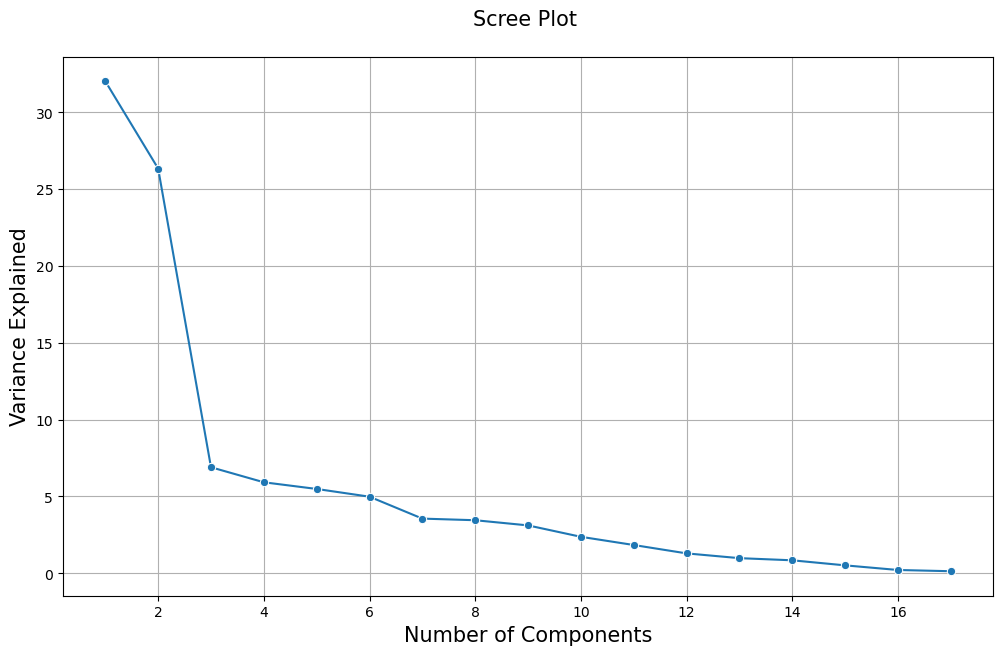

In [39]:
# Percentage cumulative variance Explained
# 2.8
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp) 

#Scree Plot
plt.figure(figsize=(12,7))
sns.lineplot(y =var_exp, x = range(1, len(var_exp)+1) , marker = 'o');
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot \n',fontsize=15)
plt.grid()
plt.show()

As shown above, 7 PC's explain approximately 85% of variance. After 7th PC the cummulative variance explained increases very slowly. Hence, in this analysis we will consider only 7 PC's to tranform data. 
<br>
Though one can choose number of principal components for the further analysis according to their requirements.

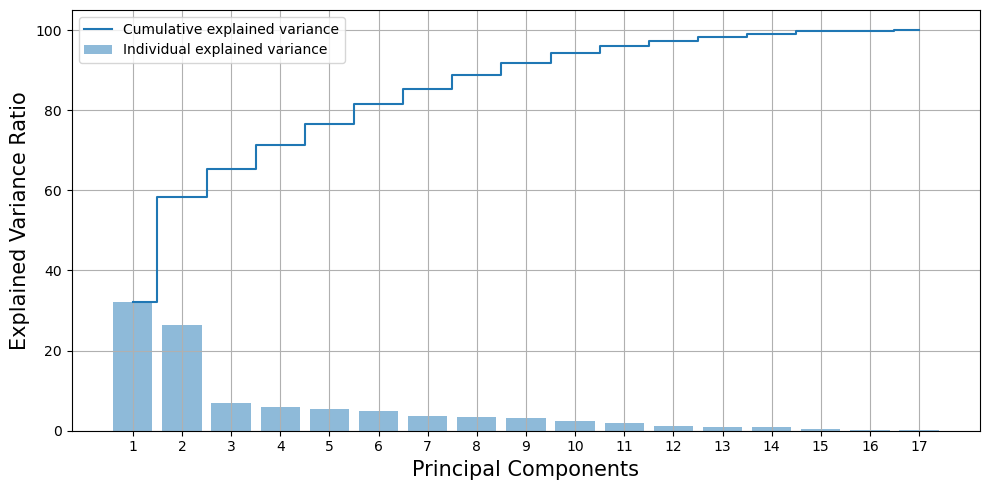

In [40]:
# Ploting 
# 2.8
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.xticks(range(1,18))
plt.legend(loc = 'best')
plt.grid()
plt.tight_layout()

This graph also represents the Individual explained variance and Cumulative explained variance on the same axis. Hence, it is easier to pick the number of principal components required for further analysis.

In [41]:
# Transforming the data using PCA object (can also be done by using eigen vectors, results will be the same)
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
df2_a_PCA = pca.fit_transform(df2_num_s)
df2_a_PCA = pd.DataFrame(df2_a_PCA)
names = df2['Names'].copy()
df2_a_PCA.insert(0,'Names',names)
df2_a_PCA.sample(5)

,Names,0,1,2,3,4,5,6
653,University of North Carolina at Greensboro,-0.287984,2.099745,-0.179114,-0.443550,0.484647,0.258150,-0.516507
417,Northeast Missouri State University,-0.095077,1.549656,-1.495648,0.727415,-1.369688,-0.104147,-0.311231
217,George Fox College,-1.749802,-1.186774,-0.364211,1.081191,-0.307245,-0.826725,-0.395284
46,Benedictine College,-1.987639,-0.912446,-1.508028,-0.128602,1.208171,-0.083411,-0.777576
562,SUNY at Buffalo,3.607966,4.828221,-0.207437,0.673561,-0.133305,0.470031,-1.670601


Further, one can also assign names to these features, logically according to the weights assigned to each feature but I am leaving it here, assuming that it to be out of scope of this project.

In [42]:
# PCs: (each value shows corresponding weights of old features in the new features)
# 2.6
df2_comp = pd.DataFrame(pca.components_,columns=df2_num_s.columns)
df2_comp

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
5,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163
6,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486,-0.025076,0.061042,0.108529,0.209744,-0.149692,0.633790,-0.001096,-0.028477,0.219259,0.243321,-0.226584,0.559944


Note that the PCA components are same as the eigen vectors (top 7 only) which we got using linear algebra methodology. Though the sign of the vectors may differ but the actual direction represented by each of these vectors will be the same in multi-dimesional space.

## Correlation among variables obatined after PCA

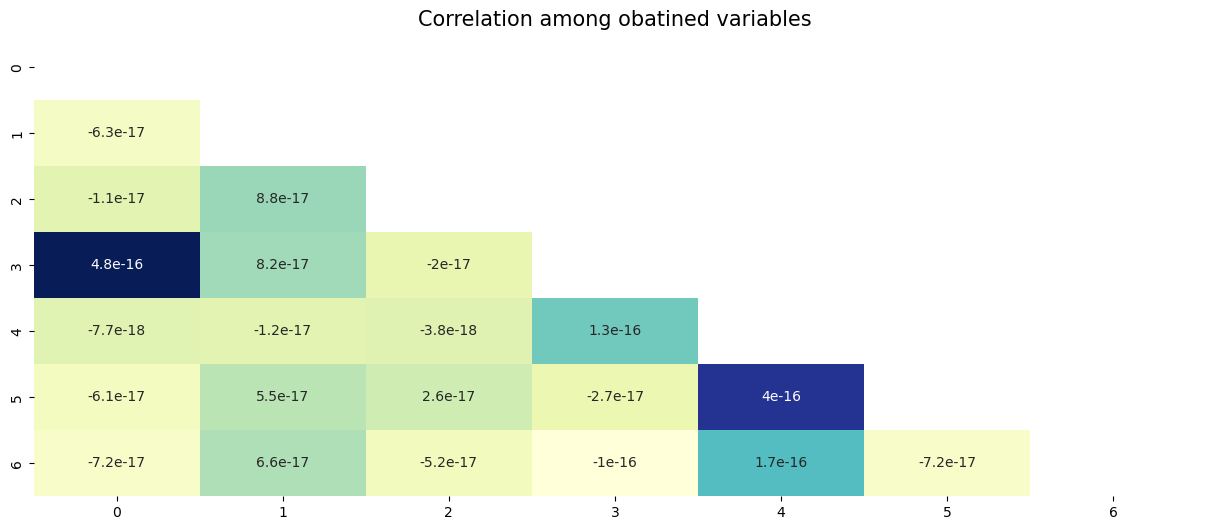

In [43]:
corr = df2_a_PCA.corr()
plt.figure(figsize=[15,6])
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,cmap='YlGnBu',mask=mask,cbar=False);
plt.title('Correlation among obatined variables',fontsize=15);

As we can clearly observe the correlation values are approximately equal to zero. Which means the components (new variables) are independent in nature.

# Conclusion

First we perfomed EDA for visualisation (Uni-variate and bi-variate analysis). Then for performing PCA we checked for range of variables using boxplots. Since, the scaling was found to be necessary we scaled the data then perfomed PCA.

After performing PCA on Education-Post dataset, we were able to decrease the number of variables from 17 to 7 which are covering around 85% of the variance in actual dataset. Then we checked for the principal components which we found to be equal to the eigen vectors (obatined by using Linear algebra). Finally we checked for correlation amoung the new variables obtained which were found to independent (Which these should be by the definition of PCs).

***

# Thank you for going through this notebook!!